In [20]:
import itertools
import pandas as pd
from openpyxl import load_workbook
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
CLASSES=['sram', 'ecaflip', 'cra', 'osamodas', 'steamer', 'sadida', 'xelor', 'eniripsa', 'enutrof', 'sacrieur', 'iop', 'roublard', 'feca', 'zobal', 'pandawa']

In [3]:
all_compo = list(itertools.combinations(CLASSES, 3))

# UTILITAIRES

In [4]:
mat_base=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
]

In [5]:
points_base={
    "sram" : 0
    ,"ecaflip" : 0
    ,"cra" : 0
    ,"osamodas" : 0
    ,"steamer" : 0
    ,"sadida" : 0
    ,"xelor" : 0
    ,"eniripsa" : 0
    ,"enutrof" : 0
    ,"sacrieur" : 0
    ,"iop" : 0
    ,"roublard" : 0
    ,"feca" : 0
    ,"zobal" : 0
    ,"pandawa" : 0
}

In [6]:
id_cl={
    "cra" : 0
    ,"ecaflip" : 1
    ,"eniripsa" : 2
    ,"enutrof" : 3
    ,"feca" : 4
    ,"iop" : 5
    ,"osamodas" : 6
    ,"pandawa" : 7
    ,"roublard" : 8
    ,"sacrieur" : 9
    ,"sadida" : 10
    ,"sram" : 11
    ,"steamer" : 12
    ,"xelor" : 13
    ,"zobal" : 14
}

In [7]:
def points_to_compo(points,duo_ban):
    # generate return dict
    compo=dict()
    for i in range(26):
        compo[i]=[]

    #calculate each compo value
    for trio in all_compo :
        temp_compo_val=0
        for cl in trio:
            temp_compo_val+=points[cl]
        flag=False
        for i in range(3):
            if trio[i] in duo_ban[trio[(i+1)%3]] or trio[i] in duo_ban[trio[(i+2)%3]]:
                flag=True

        if not flag and temp_compo_val<26:
            compo[temp_compo_val].append(trio)

    return compo

In [8]:
def in_restri(compo,restri):
    for nbp in range(26):
    # for nbp in restri.values():
        if compo in restri[nbp] and nbp<26:
            return True
    return False


In [9]:
def diff_restri_points(restri1, restri2):
    compo=dict()
    for i in range(26):
        compo[i]=[]

    for nbp in range(26):
        for comp in restri1[nbp]:
            # print(comp)
            if not in_restri(comp,restri2):
                compo[nbp].append(comp)


    for nbp in range(26):
        for comp in restri2[nbp]:
            if not in_restri(comp,restri1) and not in_restri(comp,compo):
                compo[nbp].append(comp)
    return compo

In [10]:
def points_to_excel(compo_points,filename):
    if filename[-5:]!=".xlsx":
        filename+='.xlsx'

    for k in compo_points.keys():
            if len(compo_points[k])>0:
                # if an excel sheet named filename is already present append
                if os.path.isfile(filename):
                    with pd.ExcelWriter(filename, mode='a',if_sheet_exists='replace' ) as writer:
                        temp_df=pd.DataFrame(compo_points[k])
                        temp_df.to_excel(writer, sheet_name= str(k),index=None)
                else:
                    # if not present then write to a excel file
                    with pd.ExcelWriter(filename) as writer:
                        temp_df=pd.DataFrame(compo_points[k])
                        temp_df.to_excel(writer, sheet_name= str(k),index=None)

    # writer.close()

In [11]:
def restri_to_nbcombo(restri_mat):
    nb_compo=0
    for c in all_compo:
        flag=True

        for i in range(3):
            if restri_mat[id_cl[c[i]]][id_cl[c[(i+1)%3]]]==1 or restri_mat[id_cl[c[i]]][id_cl[c[(i+2)%3]]]==1:
                flag=False

        nb_compo+=flag
    return nb_compo

In [12]:
def nb_restri(restri_mat):
    nb_restri=0
    for l in restri_mat:
        nb_restri+=sum(l)
    return nb_restri

In [13]:
def restri_to_compolist(restri_mat):
    compo_list=[]
    for c in all_compo:
        flag=True

        for i in range(3):
            if restri_mat[id_cl[c[i]]][id_cl[c[(i+1)%3]]]==1 or restri_mat[id_cl[c[i]]][id_cl[c[(i+2)%3]]]==1:
                flag=False

        if flag:compo_list.append(c)
        
    return compo_list

In [14]:
def compo_grade(points,compo_list):
    grades=dict()

    for comp in compo_list:
        note=0
        for classe in comp:
            note+=points[classe]

        if note in grades.keys():
            grades[note].append(comp)
        else:
            grades[note]=[comp]
    return dict(sorted(grades.items(), key=lambda item: item[0],reverse=True)) 

In [15]:
def filter_classe(cg,classe):
    
    res=dict()
    for k in cg.keys():
        res[k]=[tup for tup in cg[k] if classe in tup]

    return res

# restri terra

In [ ]:
points_terra={
    "sram" : 5
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 10
    ,"steamer" : 9
    ,"sadida" : 8
    ,"xelor" : 13
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 10
}
duo_ban_terra={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : ["sadida"]
    ,"steamer" : ["sacrieur","ecaflip","iop","zobal","eniripsa"]
    ,"sadida" : []
    ,"xelor" : []
    ,"eniripsa" : []
    ,"enutrof" : ["iop","eniripsa"]
    ,"sacrieur" : ["roublard","iop","zobal","eniripsa"]
    ,"iop" : []
    ,"roublard" : ["zobal"]
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["roublard","enutrof","eniripsa"]
}
points_s=dict(sorted(points_terra.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 13,
 'eniripsa': 11,
 'feca': 11,
 'osamodas': 10,
 'pandawa': 10,
 'steamer': 9,
 'enutrof': 9,
 'iop': 9,
 'zobal': 9,
 'sadida': 8,
 'sacrieur': 8,
 'ecaflip': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 5}

# Restri Oshi

In [ ]:
points_oshi={
    "sram" : 4
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 8
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 10
    ,"roublard" : 6
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_ban_oshi={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : ["zobal","sadida"]
    ,"steamer" : ["zobal"]
    ,"sadida" : []
    ,"xelor" : ["zobal","sacrieur","pandawa"]
    ,"eniripsa" : ["zobal"]
    ,"enutrof" : []
    ,"sacrieur" : ["roublard","iop","eniripsa","zobal"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["eniripsa","zobal","iop",'steamer']
}
points_s=dict(sorted(points_oshi.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'iop': 10,
 'steamer': 9,
 'enutrof': 9,
 'zobal': 9,
 'sadida': 8,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'cra': 6,
 'roublard': 6,
 'sram': 4}

In [ ]:
points_oshi2={
    "sram" : 4
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 8
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 6
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_ban_oshi2={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : ["zobal","sadida"]
    ,"steamer" : ["zobal"]
    ,"sadida" : []
    ,"xelor" : ["zobal","sacrieur","pandawa"]
    ,"eniripsa" : ["zobal"]
    ,"enutrof" : []
    ,"sacrieur" : ["roublard","iop","eniripsa","zobal"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["eniripsa","zobal","iop",'steamer']
}
points_s=dict(sorted(points_oshi.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'iop': 10,
 'steamer': 9,
 'enutrof': 9,
 'zobal': 9,
 'sadida': 8,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'cra': 6,
 'roublard': 6,
 'sram': 4}

# Restri Tili2



In [ ]:
pointsTILI2={
    "sram" : 3
    ,"ecaflip" : 6
    ,"cra" : 3
    ,"osamodas" : 10
    ,"steamer" : 8
    ,"sadida" : 6
    ,"xelor" : 15
    ,"eniripsa" : 11
    ,"enutrof" : 8
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 5
    ,"feca" : 10
    ,"zobal" : 8
    ,"pandawa" : 9
}
duo_banTILI2={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : ["sadida","zobal","feca"]
    ,"steamer" : ["iop"]
    ,"sadida" : []
    ,"xelor" : []
    ,"eniripsa" : []
    ,"enutrof" : []
    ,"sacrieur" : ["roublard","iop","zobal","eniripsa","feca"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : ["zobal"]
    ,"zobal" : []
    ,"pandawa" : ["roublard"]
}
points_s=dict(sorted(pointsTILI2.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 15,
 'eniripsa': 11,
 'osamodas': 10,
 'feca': 10,
 'iop': 9,
 'pandawa': 9,
 'steamer': 8,
 'enutrof': 8,
 'sacrieur': 8,
 'zobal': 8,
 'ecaflip': 6,
 'sadida': 6,
 'roublard': 5,
 'sram': 3,
 'cra': 3}

# Restri Herde

In [ ]:
pointsFINAL={
    "sram" : 4
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 7
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 10
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banFINAL={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : ["iop","sadida"]
    ,"steamer" : ["sacrieur"]
    ,"sadida" : []
    ,"xelor" : ["zobal",'sacrieur','pandawa']
    ,"eniripsa" : ["ecaflip","sacrieur","iop","steamer"]
    ,"enutrof" : []
    ,"sacrieur" : ["roublard","iop"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : ["zobal","sadida","iop"]
    ,"zobal" : ["osamodas","eniripsa","sacrieur","steamer"]
    ,"pandawa" : ["eniripsa","zobal","iop"]
}
points_s=dict(sorted(pointsFINAL.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'iop': 10,
 'steamer': 9,
 'enutrof': 9,
 'zobal': 9,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'sadida': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 4}

In [ ]:
pointsV4={
    "sram" : 4
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 7
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 10
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banV4={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : ["iop","sadida"]
    ,"steamer" : ["sacrieur"]
    ,"sadida" : []
    ,"xelor" : ["zobal"]
    ,"eniripsa" : ["ecaflip","sacrieur","iop","steamer"]
    ,"enutrof" : []
    ,"sacrieur" : ["roublard","iop"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : ["zobal","sadida","iop"]
    ,"zobal" : ["osamodas","eniripsa","sacrieur","steamer"]
    ,"pandawa" : ["eniripsa","zobal","iop"]
}
points_s=dict(sorted(pointsV4.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'iop': 10,
 'steamer': 9,
 'enutrof': 9,
 'zobal': 9,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'sadida': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 4}

In [ ]:
pointsV2={
    "sram" : 3
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 7
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banV2={
    "sram" : []
    ,"ecaflip" : []
    ,"cra" : []
    ,"osamodas" : []
    ,"steamer" : ["iop","zobal","sacrieur","pandawa"]
    ,"sadida" : []
    ,"xelor" : ["roublard","enutrof","ecaflip"]
    ,"eniripsa" : []
    ,"enutrof" : ["iop"]
    ,"sacrieur" : ["roublard","iop"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["eniripsa","zobal"]
}
points_s=dict(sorted(pointsV2.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'steamer': 9,
 'enutrof': 9,
 'iop': 9,
 'zobal': 9,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'sadida': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 3}

In [ ]:
pointsV2_eca={
    "sram" : 3
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 7
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banV2_eca={
    "sram" : []
    ,"ecaflip" : ["eniripsa"]
    ,"cra" : []
    ,"osamodas" : []
    ,"steamer" : ["iop","zobal","sacrieur","pandawa"]
    ,"sadida" : []
    ,"xelor" : ["roublard","enutrof","ecaflip"]
    ,"eniripsa" : []
    ,"enutrof" : ["iop"]
    ,"sacrieur" : ["roublard","iop"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["eniripsa","zobal"]
}
points_s=dict(sorted(pointsV2_eca.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'steamer': 9,
 'enutrof': 9,
 'iop': 9,
 'zobal': 9,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'sadida': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 3}

In [ ]:
pointsV2_eca_sadi={
    "sram" : 4
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 7
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banV2_eca_sadi={
    "sram" : []
    ,"ecaflip" : ["eniripsa"]
    ,"cra" : []
    ,"osamodas" : []
    ,"steamer" : ["iop","zobal","sacrieur","pandawa"]
    ,"sadida" : []
    ,"xelor" : ["roublard","enutrof","ecaflip"]
    ,"eniripsa" : []
    ,"enutrof" : ["iop"]
    ,"sacrieur" : ["roublard","iop"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["eniripsa","zobal"]
}
points_s=dict(sorted(pointsV2_eca_sadi.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'steamer': 9,
 'enutrof': 9,
 'iop': 9,
 'zobal': 9,
 'sacrieur': 8,
 'pandawa': 8,
 'ecaflip': 7,
 'sadida': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 4}

In [ ]:
pointsV2_eca_sadi_sram={
    "sram" : 4
    ,"ecaflip" : 7
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 8
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banV2_eca_sadi_sram={
    "sram" : []
    ,"ecaflip" : ["eniripsa"]
    ,"cra" : []
    ,"osamodas" : []
    ,"steamer" : ["iop","zobal","sacrieur","pandawa"]
    ,"sadida" : []
    ,"xelor" : ["roublard","enutrof","ecaflip"]
    ,"eniripsa" : []
    ,"enutrof" : ["iop"]
    ,"sacrieur" : ["roublard","iop"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : []
    ,"zobal" : []
    ,"pandawa" : ["eniripsa","zobal"]
}
points_s=dict(sorted(duo_banV2_eca_sadi_sram.items(), key=lambda item: item[1],reverse=True))
points_s

{'sacrieur': ['roublard', 'iop'],
 'xelor': ['roublard', 'enutrof', 'ecaflip'],
 'steamer': ['iop', 'zobal', 'sacrieur', 'pandawa'],
 'enutrof': ['iop'],
 'pandawa': ['eniripsa', 'zobal'],
 'ecaflip': ['eniripsa'],
 'sram': [],
 'cra': [],
 'osamodas': [],
 'sadida': [],
 'eniripsa': [],
 'iop': [],
 'roublard': [],
 'feca': [],
 'zobal': []}

In [ ]:
pointsV3={
    "sram" : 4
    ,"ecaflip" : 8
    ,"cra" : 6
    ,"osamodas" : 11
    ,"steamer" : 9
    ,"sadida" : 7
    ,"xelor" : 12
    ,"eniripsa" : 11
    ,"enutrof" : 9
    ,"sacrieur" : 8
    ,"iop" : 9
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 9
    ,"pandawa" : 8
}
duo_banV3={
    "sram" : []
    ,"ecaflip" : ["eniripsa"]
    ,"cra" : []
    ,"osamodas" : []
    ,"steamer" : ["iop","sacrieur"]
    ,"sadida" : []
    ,"xelor" : ["roublard","ecaflip","zobal","iop"]
    ,"eniripsa" : []
    ,"enutrof" : ["iop"]
    ,"sacrieur" : ["roublard","iop","eniripsa"]
    ,"iop" : []
    ,"roublard" : []
    ,"feca" : ["zobal"]
    ,"zobal" : ["osamodas","eniripsa"]
    ,"pandawa" : ["eniripsa","zobal","iop"]
}
points_s=dict(sorted(pointsV3.items(), key=lambda item: item[1],reverse=True))
points_s

{'xelor': 12,
 'osamodas': 11,
 'eniripsa': 11,
 'feca': 11,
 'steamer': 9,
 'enutrof': 9,
 'iop': 9,
 'zobal': 9,
 'ecaflip': 8,
 'sacrieur': 8,
 'pandawa': 8,
 'sadida': 7,
 'roublard': 7,
 'cra': 6,
 'sram': 4}

# Calculs

In [ ]:
compo_pointsV2=points_to_compo(pointsV2,duo_banV2)
compo_pointsV2_eca=points_to_compo(pointsV2_eca,duo_banV2_eca)
compo_pointsV2_eca_sadi=points_to_compo(pointsV2_eca_sadi,duo_banV2_eca_sadi)
compo_pointsV2_eca_sadi_sram=points_to_compo(pointsV2_eca_sadi_sram,duo_banV2_eca_sadi_sram)
compo_points_terra=points_to_compo(points_terra,duo_ban_terra)
compo_pointsV3=points_to_compo(pointsV3,duo_banV3)
compo_points_oshi=points_to_compo(points_oshi,duo_ban_oshi)
compo_points_oshi2=points_to_compo(points_oshi2,duo_ban_oshi2)
compo_pointsV3=points_to_compo(pointsV3,duo_banV3)
compo_pointsV4=points_to_compo(pointsV4,duo_banV4)
compo_pointsFINAL=points_to_compo(pointsFINAL,duo_banFINAL)
compo_pointsTILI2=points_to_compo(pointsTILI2,duo_banTILI2)



In [ ]:
compo_pointsFINAL

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [('sram', 'ecaflip', 'cra'),
  ('sram', 'cra', 'sadida'),
  ('sram', 'cra', 'roublard')],
 18: [('sram', 'ecaflip', 'sadida'),
  ('sram', 'ecaflip', 'roublard'),
  ('sram', 'cra', 'sacrieur'),
  ('sram', 'cra', 'pandawa'),
  ('sram', 'sadida', 'roublard')],
 19: [('sram', 'ecaflip', 'sacrieur'),
  ('sram', 'ecaflip', 'pandawa'),
  ('sram', 'cra', 'steamer'),
  ('sram', 'cra', 'enutrof'),
  ('sram', 'cra', 'zobal'),
  ('sram', 'sadida', 'sacrieur'),
  ('sram', 'sadida', 'pandawa'),
  ('sram', 'roublard', 'pandawa')],
 20: [('sram', 'ecaflip', 'steamer'),
  ('sram', 'ecaflip', 'enutrof'),
  ('sram', 'ecaflip', 'zobal'),
  ('sram', 'cra', 'iop'),
  ('sram', 'steamer', 'sadida'),
  ('sram', 'steamer', 'roublard'),
  ('sram', 'sadida', 'enutrof'),
  ('sram', 'sadida', 'zobal'),
  ('sram', 'enutrof', 'roublard'),
  ('sram', 'sacrieur', 'pandawa')

In [ ]:
nb_compo_points=0
for p in range(26):
    nb_compo_points+=len(compo_pointsTILI2[p])
nb_compo_points

217

# modifs

In [ ]:
modif_1=diff_restri_points(compo_pointsV2, compo_pointsV2_eca)
modif_2=diff_restri_points(compo_pointsV2_eca, compo_pointsV2_eca_sadi)
modif_3=diff_restri_points(compo_pointsV2_eca_sadi, compo_pointsV2_eca_sadi_sram)

modifV3=diff_restri_points(compo_pointsV3,compo_pointsV2_eca_sadi)

modif_oshi=diff_restri_points(compo_points_oshi2,compo_points_oshi)


NameError: name 'compo_pointsV2' is not defined

In [ ]:
modif_oshi

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [('sram', 'xelor', 'iop'),
  ('ecaflip', 'steamer', 'iop'),
  ('ecaflip', 'enutrof', 'iop'),
  ('ecaflip', 'iop', 'zobal')]}

In [ ]:
modifV3

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [('sram', 'steamer', 'pandawa'), ('sram', 'iop', 'pandawa')],
 22: [('sram', 'steamer', 'zobal')],
 23: [('cra', 'steamer', 'pandawa'),
  ('sram', 'eniripsa', 'sacrieur'),
  ('cra', 'iop', 'pandawa')],
 24: [('cra', 'steamer', 'zobal'),
  ('steamer', 'sadida', 'pandawa'),
  ('steamer', 'roublard', 'pandawa'),
  ('sram', 'osamodas', 'zobal'),
  ('sram', 'eniripsa', 'zobal'),
  ('sram', 'feca', 'zobal'),
  ('ecaflip', 'iop', 'pandawa'),
  ('sadida', 'iop', 'pandawa'),
  ('iop', 'roublard', 'pandawa')],
 25: [('sram', 'xelor', 'enutrof'),
  ('ecaflip', 'steamer', 'pandawa'),
  ('steamer', 'sadida', 'zobal'),
  ('steamer', 'roublard', 'zobal'),
  ('sram', 'xelor', 'iop'),
  ('sram', 'xelor', 'zobal'),
  ('ecaflip', 'osamodas', 'sadida'),
  ('ecaflip', 'osamodas', 'roublard'),
  ('ecaflip', 'steamer', 'enutrof

In [ ]:
modif_1

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [('sram', 'ecaflip', 'eniripsa')],
 22: [],
 23: [],
 24: [('ecaflip', 'cra', 'eniripsa')],
 25: [('ecaflip', 'sadida', 'eniripsa'), ('ecaflip', 'eniripsa', 'roublard')]}

In [ ]:
modif_2

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [('sram', 'osamodas', 'eniripsa'),
  ('sram', 'osamodas', 'feca'),
  ('sram', 'eniripsa', 'feca')]}

In [ ]:
modif_3

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [('ecaflip', 'osamodas', 'sadida'),
  ('ecaflip', 'sadida', 'feca'),
  ('cra', 'sadida', 'xelor'),
  ('osamodas', 'sadida', 'roublard'),
  ('steamer', 'sadida', 'enutrof'),
  ('sadida', 'eniripsa', 'roublard'),
  ('sadida', 'enutrof', 'zobal'),
  ('sadida', 'iop', 'zobal'),
  ('sadida', 'roublard', 'feca')]}

In [ ]:
diff_restri_points(compo_pointsV3,compo_points_oshi)

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [('sram', 'steamer', 'pandawa'),
  ('sram', 'sacrieur', 'zobal'),
  ('sram', 'steamer', 'sacrieur')],
 22: [('sram', 'osamodas', 'sadida'),
  ('sram', 'steamer', 'zobal'),
  ('sram', 'ecaflip', 'eniripsa'),
  ('sram', 'xelor', 'roublard')],
 23: [('cra', 'steamer', 'pandawa'),
  ('cra', 'sacrieur', 'zobal'),
  ('sram', 'ecaflip', 'xelor'),
  ('sram', 'steamer', 'iop'),
  ('sram', 'enutrof', 'iop'),
  ('cra', 'steamer', 'sacrieur')],
 24: [('sram', 'xelor', 'sacrieur'),
  ('sram', 'xelor', 'pandawa'),
  ('cra', 'osamodas', 'sadida'),
  ('cra', 'steamer', 'zobal'),
  ('steamer', 'sadida', 'pandawa'),
  ('steamer', 'roublard', 'pandawa'),
  ('sadida', 'sacrieur', 'zobal'),
  ('sram', 'feca', 'zobal'),
  ('ecaflip', 'cra', 'eniripsa'),
  ('ecaflip', 'osamodas', 'roublard'),
  ('ecaflip', 'steamer', 'sacrieur'

# export to excel

In [ ]:
# points_to_excel(compo_pointsV3,"compo_pointsV3.xlsx")
#points_to_excel(compo_points_oshi,"compo_points_oshi.xlsx")
#points_to_excel(compo_pointsV4,"compo_pointsV4.xlsx")
#points_to_excel(compo_pointsFINAL,"compo_pointsFINAL.xlsx")
points_to_excel(compo_pointsTILI2,"compo_pointsTILI2.xlsx")

# Tableau restri décompte

on prend les colonnes du tableau de restri

In [ ]:
restri_mat_base=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
]
print(nb_restri(restri_mat_base))
restri_to_nbcombo(restri_mat_base)

15


455

In [ ]:
restri_mat_herde=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,0,1,0,1,1,1,0,1,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,1,0,1,1,0,0,0,1,0,0,1,0,0],
    [0,1,1,1,1,1,1,1,1,1,0,0,0,1,0],
    [0,0,1,1,1,1,1,1,0,1,0,0,1,1,1],
]
print(nb_restri(restri_mat_herde))
restri_to_nbcombo(restri_mat_herde)

60


108

In [ ]:
restri_mat_oshi=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,0,1,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,1,1,0,1,1,1,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,1,1,0,1,1,1,0,0,1,0,0,1,0,0],
    [0,1,1,1,1,1,1,1,1,1,0,0,0,1,0],
    [0,0,1,0,1,1,1,1,0,1,0,0,1,1,1],
]
print(nb_restri(restri_mat_oshi))
restri_to_nbcombo(restri_mat_oshi)

60


107

In [ ]:
restri_mat_terra=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,1,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,1,1,0,1,1,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,1,1,0,1,1,0,0,0,1,0,0,1,0,0],
    [0,1,1,1,1,1,1,1,1,1,0,0,0,1,0],
    [0,0,1,0,1,1,1,1,0,1,0,0,1,1,1],
]
print(nb_restri(restri_mat_terra))
restri_to_nbcombo(restri_mat_terra)

63


97

In [ ]:
restri_mat_herde_ca12=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,1,1,0,1,0,0,0,1,1,0,0,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,0,0,1,0,0],
    [0,1,1,1,1,1,1,1,0,1,1,0,1,1,0],
    [0,1,1,0,1,0,1,0,0,1,1,0,1,1,1],
]

points_263={
    "sram" : 4
    ,"ecaflip" : 12
    ,"cra" : 6
    ,"osamodas" : 10
    ,"steamer" : 10
    ,"sadida" : 9
    ,"xelor" : 13
    ,"eniripsa" : 13
    ,"enutrof" : 11
    ,"sacrieur" : 9
    ,"iop" : 7
    ,"roublard" : 8
    ,"feca" : 10
    ,"zobal" : 9
    ,"pandawa" : 9
}
print(nb_restri(restri_mat_herde_ca12))
print(restri_to_nbcombo(restri_mat_herde_ca12))
cg=compo_grade(points_263,restri_to_compolist(restri_mat_herde_ca12))
cg

56
128


{31: [('ecaflip', 'enutrof', 'roublard')],
 30: [('ecaflip', 'enutrof', 'iop'),
  ('osamodas', 'enutrof', 'sacrieur'),
  ('steamer', 'sadida', 'enutrof'),
  ('steamer', 'enutrof', 'sacrieur')],
 29: [('ecaflip', 'cra', 'enutrof'),
  ('osamodas', 'enutrof', 'roublard'),
  ('steamer', 'enutrof', 'roublard'),
  ('sadida', 'enutrof', 'sacrieur'),
  ('enutrof', 'roublard', 'feca')],
 28: [('osamodas', 'enutrof', 'iop'),
  ('osamodas', 'sacrieur', 'pandawa'),
  ('steamer', 'sadida', 'sacrieur'),
  ('steamer', 'sadida', 'pandawa'),
  ('steamer', 'enutrof', 'iop'),
  ('steamer', 'sacrieur', 'pandawa'),
  ('sadida', 'enutrof', 'roublard'),
  ('eniripsa', 'iop', 'roublard'),
  ('enutrof', 'iop', 'feca'),
  ('enutrof', 'roublard', 'zobal')],
 27: [('sram', 'ecaflip', 'enutrof'),
  ('ecaflip', 'iop', 'roublard'),
  ('cra', 'osamodas', 'enutrof'),
  ('cra', 'steamer', 'enutrof'),
  ('cra', 'xelor', 'roublard'),
  ('cra', 'eniripsa', 'roublard'),
  ('cra', 'enutrof', 'feca'),
  ('steamer', 'sadida',

In [ ]:
filter_classe(cg,'roublard')

{28: [('eniripsa', 'iop', 'roublard')],
 27: [('ecaflip', 'enutrof', 'roublard'),
  ('cra', 'xelor', 'roublard'),
  ('cra', 'eniripsa', 'roublard'),
  ('osamodas', 'enutrof', 'roublard'),
  ('steamer', 'sadida', 'roublard'),
  ('steamer', 'enutrof', 'roublard'),
  ('enutrof', 'roublard', 'feca')],
 26: [('sadida', 'enutrof', 'roublard'), ('enutrof', 'roublard', 'zobal')],
 25: [('sram', 'xelor', 'roublard'),
  ('sram', 'eniripsa', 'roublard'),
  ('ecaflip', 'iop', 'roublard'),
  ('osamodas', 'iop', 'roublard'),
  ('steamer', 'iop', 'roublard'),
  ('iop', 'roublard', 'feca')],
 24: [('ecaflip', 'cra', 'roublard'),
  ('cra', 'osamodas', 'roublard'),
  ('cra', 'steamer', 'roublard'),
  ('cra', 'roublard', 'feca'),
  ('sadida', 'iop', 'roublard'),
  ('enutrof', 'iop', 'roublard'),
  ('iop', 'roublard', 'zobal')],
 23: [('cra', 'sadida', 'roublard'),
  ('cra', 'enutrof', 'roublard'),
  ('cra', 'roublard', 'zobal')],
 22: [('sram', 'ecaflip', 'roublard'),
  ('sram', 'osamodas', 'roublard'),


In [ ]:
restri_mat_herde_clandestin1_2025=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,1,1,0,1,0,1,0,0,1,0,0,0,1,0],
    [0,0,1,0,1,0,1,0,0,1,0,0,0,1,1],
]

points_263={
    "sram" : 4
    ,"ecaflip" : 12
    ,"cra" : 6
    ,"osamodas" : 10
    ,"steamer" : 10
    ,"sadida" : 9
    ,"xelor" : 13
    ,"eniripsa" : 13
    ,"enutrof" : 11
    ,"sacrieur" : 10
    ,"iop" : 7
    ,"roublard" : 8
    ,"feca" : 10
    ,"zobal" : 9
    ,"pandawa" : 9
}
print(nb_restri(restri_mat_herde_clandestin1_2025))
print(restri_to_nbcombo(restri_mat_herde_clandestin1_2025))
cg=compo_grade(points_263,restri_to_compolist(restri_mat_herde_clandestin1_2025))
cg

33
270


{34: [('steamer', 'xelor', 'enutrof'), ('steamer', 'eniripsa', 'enutrof')],
 33: [('ecaflip', 'steamer', 'enutrof'),
  ('ecaflip', 'enutrof', 'sacrieur'),
  ('ecaflip', 'enutrof', 'feca'),
  ('sadida', 'xelor', 'enutrof'),
  ('sadida', 'eniripsa', 'enutrof')],
 32: [('ecaflip', 'steamer', 'sacrieur'),
  ('ecaflip', 'steamer', 'feca'),
  ('ecaflip', 'sadida', 'enutrof'),
  ('ecaflip', 'enutrof', 'zobal'),
  ('steamer', 'sadida', 'xelor'),
  ('steamer', 'sadida', 'eniripsa'),
  ('steamer', 'xelor', 'pandawa'),
  ('steamer', 'eniripsa', 'pandawa'),
  ('xelor', 'enutrof', 'roublard'),
  ('eniripsa', 'enutrof', 'roublard')],
 31: [('ecaflip', 'steamer', 'sadida'),
  ('ecaflip', 'steamer', 'zobal'),
  ('ecaflip', 'steamer', 'pandawa'),
  ('ecaflip', 'sadida', 'sacrieur'),
  ('ecaflip', 'sadida', 'feca'),
  ('ecaflip', 'enutrof', 'roublard'),
  ('ecaflip', 'sacrieur', 'pandawa'),
  ('ecaflip', 'feca', 'pandawa'),
  ('osamodas', 'steamer', 'enutrof'),
  ('osamodas', 'enutrof', 'sacrieur'),
  (

In [ ]:
#JDA 3

restri_jda3=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,0,1,0,1,0,1,0,1,1,0,0,0,0,0],
    [0,0,1,0,1,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,1,0,0,0,1,0,0,1,0,0,1,0,0],
    [0,0,1,1,1,0,1,1,0,1,1,0,1,1,0],
    [0,0,1,0,1,0,1,1,0,1,0,0,1,1,1],
]
print(nb_restri(restri_jda3))
restri_to_nbcombo(restri_jda3)

points_jda3={
    "sram" : 4
    ,"ecaflip" : 11
    ,"cra" : 9
    ,"osamodas" : 12
    ,"steamer" : 10
    ,"sadida" : 10
    ,"xelor" : 14
    ,"eniripsa" : 13
    ,"enutrof" : 10
    ,"sacrieur" : 10
    ,"iop" : 7
    ,"roublard" : 7
    ,"feca" : 11
    ,"zobal" : 10
    ,"pandawa" : 10
}
print(nb_restri(restri_jda3))
print(restri_to_nbcombo(restri_jda3))
cg=compo_grade(points_jda3,restri_to_compolist(restri_jda3))
cg


48
48
171


{34: [('ecaflip', 'cra', 'xelor')],
 32: [('ecaflip', 'steamer', 'feca'),
  ('ecaflip', 'xelor', 'iop'),
  ('ecaflip', 'xelor', 'roublard'),
  ('ecaflip', 'enutrof', 'feca'),
  ('ecaflip', 'feca', 'pandawa'),
  ('cra', 'eniripsa', 'enutrof')],
 31: [('ecaflip', 'cra', 'feca'),
  ('ecaflip', 'steamer', 'sadida'),
  ('ecaflip', 'steamer', 'enutrof'),
  ('ecaflip', 'steamer', 'pandawa'),
  ('ecaflip', 'sadida', 'enutrof'),
  ('ecaflip', 'sadida', 'sacrieur'),
  ('ecaflip', 'sadida', 'zobal'),
  ('ecaflip', 'sadida', 'pandawa'),
  ('ecaflip', 'enutrof', 'sacrieur'),
  ('ecaflip', 'enutrof', 'zobal'),
  ('ecaflip', 'sacrieur', 'pandawa'),
  ('cra', 'osamodas', 'enutrof'),
  ('cra', 'osamodas', 'pandawa'),
  ('steamer', 'enutrof', 'feca'),
  ('steamer', 'feca', 'pandawa')],
 30: [('ecaflip', 'cra', 'steamer'),
  ('ecaflip', 'cra', 'sadida'),
  ('ecaflip', 'cra', 'enutrof'),
  ('ecaflip', 'cra', 'sacrieur'),
  ('ecaflip', 'cra', 'zobal'),
  ('ecaflip', 'cra', 'pandawa'),
  ('cra', 'steamer', 

- xelor : 14
- eniripsa : 13
- osamodas : 12
- feca : 11
- ecaflip : 11
- steamer : 10
- sadida : 10
- enutrof : 10
- sacrieur : 10
- zobal : 10
- pandawa : 10
- cra : 9
- iop : 7
- roublard : 7
- sram : 4

In [ ]:
list_to_def=[]
for points in cg:
    for comp in cg[points]:
        temp_dict=dict()
        compo_s=sorted(comp)
        # temp_dict["Points"]=points
        temp_dict["C1"]=compo_s[0]
        temp_dict["C3"]=compo_s[1]
        temp_dict["C2"]=compo_s[2]
        list_to_def.append(temp_dict)

list_to_def

[{'C1': 'cra', 'C3': 'ecaflip', 'C2': 'xelor'},
 {'C1': 'ecaflip', 'C3': 'feca', 'C2': 'steamer'},
 {'C1': 'ecaflip', 'C3': 'iop', 'C2': 'xelor'},
 {'C1': 'ecaflip', 'C3': 'roublard', 'C2': 'xelor'},
 {'C1': 'ecaflip', 'C3': 'enutrof', 'C2': 'feca'},
 {'C1': 'ecaflip', 'C3': 'feca', 'C2': 'pandawa'},
 {'C1': 'cra', 'C3': 'eniripsa', 'C2': 'enutrof'},
 {'C1': 'cra', 'C3': 'ecaflip', 'C2': 'feca'},
 {'C1': 'ecaflip', 'C3': 'sadida', 'C2': 'steamer'},
 {'C1': 'ecaflip', 'C3': 'enutrof', 'C2': 'steamer'},
 {'C1': 'ecaflip', 'C3': 'pandawa', 'C2': 'steamer'},
 {'C1': 'ecaflip', 'C3': 'enutrof', 'C2': 'sadida'},
 {'C1': 'ecaflip', 'C3': 'sacrieur', 'C2': 'sadida'},
 {'C1': 'ecaflip', 'C3': 'sadida', 'C2': 'zobal'},
 {'C1': 'ecaflip', 'C3': 'pandawa', 'C2': 'sadida'},
 {'C1': 'ecaflip', 'C3': 'enutrof', 'C2': 'sacrieur'},
 {'C1': 'ecaflip', 'C3': 'enutrof', 'C2': 'zobal'},
 {'C1': 'ecaflip', 'C3': 'pandawa', 'C2': 'sacrieur'},
 {'C1': 'cra', 'C3': 'enutrof', 'C2': 'osamodas'},
 {'C1': 'cra', 

In [ ]:
jda_compo=pd.DataFrame(list_to_def)
jda_compo.to_excel("JDA#3/jda_compo.xlsx",index=False)
jda_compo

,Points,C1,C3,C2
0,34,cra,ecaflip,xelor
1,32,ecaflip,feca,steamer
2,32,ecaflip,iop,xelor
3,32,ecaflip,roublard,xelor
4,32,ecaflip,enutrof,feca
...,...,...,...,...
166,21,iop,pandawa,sram
167,21,roublard,sram,zobal
168,20,cra,iop,sram
169,20,cra,roublard,sram


In [ ]:
#rixe league s1

restri_RLS1=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,1,0,0],
    [0,1,1,0,1,0,1,1,0,1,1,0,1,1,0],
    [0,0,1,0,1,0,1,1,0,1,0,0,0,1,1],
]

points_RLS1={
    'sram': 0,
    'ecaflip': 2,
    'cra': 1,
    'osamodas': 3,
    'steamer': 1,
    'sadida': 4,
    'xelor': 3,
    'eniripsa': 4,
    'enutrof': 2,
    'sacrieur': 2,
    'iop': 1,
    'roublard': 1,
    'feca': 4,
    'zobal': 4,
    'pandawa':3
}
print(nb_restri(restri_RLS1))
print(restri_to_nbcombo(restri_RLS1))
cg=compo_grade(points_RLS1,restri_to_compolist(restri_RLS1))
sadigang=filter_classe(cg,"sadida")
# for comp in sadigang[0]:
#     print('- '+str(comp).replace("'","").replace("(","").replace(")",""))
for grade in cg:
    print(f"**COMPO À {grade} POINTS:**")
    for comp in cg[grade]:
        print('- '+str(comp).replace("'","").replace("(","").replace(")",""))
    print()


38
244
**COMPO À 11 POINTS:**
- sadida, feca, pandawa

**COMPO À 10 POINTS:**
- ecaflip, sadida, feca
- ecaflip, sadida, zobal
- osamodas, feca, pandawa
- sadida, enutrof, feca
- sadida, enutrof, zobal

**COMPO À 9 POINTS:**
- ecaflip, osamodas, feca
- ecaflip, sadida, pandawa
- ecaflip, feca, pandawa
- cra, sadida, eniripsa
- cra, sadida, feca
- cra, sadida, zobal
- osamodas, enutrof, feca
- steamer, sadida, eniripsa
- steamer, sadida, feca
- steamer, sadida, zobal
- sadida, eniripsa, iop
- sadida, eniripsa, roublard
- sadida, enutrof, pandawa
- sadida, sacrieur, pandawa
- sadida, iop, feca
- sadida, iop, zobal
- sadida, roublard, feca
- sadida, roublard, zobal
- enutrof, feca, pandawa

**COMPO À 8 POINTS:**
- sram, sadida, eniripsa
- sram, sadida, feca
- sram, sadida, zobal
- ecaflip, osamodas, pandawa
- ecaflip, sadida, enutrof
- ecaflip, sadida, sacrieur
- ecaflip, enutrof, feca
- ecaflip, enutrof, zobal
- cra, osamodas, feca
- cra, sadida, pandawa
- cra, feca, pandawa
- osamodas, 

In [ ]:
#KELEROG MASTER CUP 1 

restri_KMC1=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,1,1,0,1,1,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,1,0,0,1,0,0,0,1,0,0,1,0,0],
    [0,0,1,0,1,1,1,1,0,1,1,0,0,1,0],
    [0,0,1,0,1,0,1,1,0,0,1,0,1,1,1],
]

points_KMC1={
    'sram': 0,
    'ecaflip': 2,
    'cra': 1,
    'osamodas': 3,
    'steamer': 1,
    'sadida': 4,
    'xelor': 3,
    'eniripsa': 4,
    'enutrof': 2,
    'sacrieur': 2,
    'iop': 3,
    'roublard': 1,
    'feca': 4,
    'zobal': 4,
    'pandawa':3
}
print(nb_restri(restri_KMC1))
print(restri_to_nbcombo(restri_KMC1))
cg=compo_grade(points_KMC1,restri_to_compolist(restri_KMC1))
sadigang=filter_classe(cg,"sadida")
# for comp in sadigang[0]:
#     print('- '+str(comp).replace("'","").replace("(","").replace(")",""))
for grade in cg:
    print(f"**COMPO À {grade} POINTS:**")
    for comp in cg[grade]:
        print('- '+str(comp).replace("'","").replace("(","").replace(")",""))
    print()


48
162
**COMPO À 10 POINTS:**
- ecaflip, sadida, feca
- eniripsa, iop, pandawa
- iop, feca, pandawa

**COMPO À 9 POINTS:**
- ecaflip, feca, pandawa
- cra, sadida, feca
- osamodas, iop, pandawa
- steamer, sadida, feca
- sadida, roublard, feca
- eniripsa, enutrof, iop
- enutrof, iop, feca
- enutrof, iop, zobal
- sacrieur, iop, zobal

**COMPO À 8 POINTS:**
- sram, sadida, feca
- ecaflip, sadida, sacrieur
- ecaflip, sacrieur, zobal
- cra, eniripsa, iop
- cra, eniripsa, pandawa
- cra, iop, feca
- cra, iop, zobal
- cra, feca, pandawa
- osamodas, sacrieur, iop
- osamodas, sacrieur, pandawa
- steamer, feca, pandawa
- eniripsa, iop, roublard
- eniripsa, roublard, pandawa
- enutrof, sacrieur, zobal
- sacrieur, iop, pandawa
- iop, roublard, feca
- iop, roublard, zobal
- roublard, feca, pandawa

**COMPO À 7 POINTS:**
- sram, eniripsa, iop
- sram, eniripsa, pandawa
- sram, iop, feca
- sram, iop, zobal
- sram, feca, pandawa
- ecaflip, cra, sadida
- ecaflip, cra, feca
- ecaflip, cra, zobal
- ecaflip,

In [25]:
pd.DataFrame(restri_to_compolist(restri_KMC1)).to_excel("Kelerog_master_cup_1/compo_possibles.xlsx",index=None)

In [21]:
restri_to_compolist(restri_KMC1)

[('sram', 'ecaflip', 'cra'),
 ('sram', 'ecaflip', 'steamer'),
 ('sram', 'ecaflip', 'sadida'),
 ('sram', 'ecaflip', 'xelor'),
 ('sram', 'ecaflip', 'sacrieur'),
 ('sram', 'ecaflip', 'roublard'),
 ('sram', 'ecaflip', 'feca'),
 ('sram', 'ecaflip', 'zobal'),
 ('sram', 'ecaflip', 'pandawa'),
 ('sram', 'cra', 'osamodas'),
 ('sram', 'cra', 'steamer'),
 ('sram', 'cra', 'sadida'),
 ('sram', 'cra', 'xelor'),
 ('sram', 'cra', 'eniripsa'),
 ('sram', 'cra', 'enutrof'),
 ('sram', 'cra', 'sacrieur'),
 ('sram', 'cra', 'iop'),
 ('sram', 'cra', 'roublard'),
 ('sram', 'cra', 'feca'),
 ('sram', 'cra', 'zobal'),
 ('sram', 'cra', 'pandawa'),
 ('sram', 'osamodas', 'steamer'),
 ('sram', 'osamodas', 'sacrieur'),
 ('sram', 'osamodas', 'iop'),
 ('sram', 'osamodas', 'roublard'),
 ('sram', 'osamodas', 'pandawa'),
 ('sram', 'steamer', 'sadida'),
 ('sram', 'steamer', 'xelor'),
 ('sram', 'steamer', 'enutrof'),
 ('sram', 'steamer', 'roublard'),
 ('sram', 'steamer', 'feca'),
 ('sram', 'steamer', 'pandawa'),
 ('sram', 's

In [1]:
nb_rondes=6
nb_equipes=50

In [5]:
tournois = { str(i) : {"win" : [], "lose" : [], 'pva' : -1} for i in range(nb_equipes)}

In [6]:
groupes = {}
for i in tournois:
    nb_win=len(tournois[i]["win"])
    if nb_win in groupes:
        groupes[nb_win].append(i)
    else:
        groupes[nb_win]=[i]
groupes

{0: ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49']}

In [ ]:
rencontres=[]


In [21]:
#TILIWAN CUP#1 

restri_TC1=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
]
duo_ban_TC1={
    "sram" :        []
    ,"ecaflip" :    []
    ,"cra" :        []
    ,"osamodas" :   []
    ,"steamer" :    []
    ,"sadida" :     []
    ,"xelor" :      []
    ,"eniripsa" :   []
    ,"enutrof" :    []
    ,"sacrieur" :   []
    ,"iop" :        []
    ,"roublard" :   []
    ,"feca" :       []
    ,"zobal" :      []
    ,"pandawa" :    []
}

points_TC1={
    'sram':     5,
    'ecaflip':  6,
    'cra':      6,
    'osamodas': 9,
    'steamer':  8,
    'sadida':   10,
    'xelor':    11,
    'eniripsa': 11,
    'enutrof':  9,
    'sacrieur': 9,
    'iop':      8,
    'roublard': 7,
    'feca':     10,
    'zobal':    10,
    'pandawa':  7
}
print(nb_restri(restri_TC1))
print(restri_to_nbcombo(restri_TC1))
cg=compo_grade(points_TC1,restri_to_compolist(restri_TC1))
sadigang=filter_classe(cg,"sadida")
# for comp in sadigang[0]:
#     print('- '+str(comp).replace("'","").replace("(","").replace(")",""))
for grade in cg:
    if grade<26:
        print(f"**COMPO À {grade} POINTS:**")
        for comp in cg[grade]:
            print('- '+str(comp).replace("'","").replace("(","").replace(")",""))
        print()


15
455
**COMPO À 25 POINTS:**
- sram, osamodas, xelor
- sram, osamodas, eniripsa
- sram, sadida, feca
- sram, sadida, zobal
- sram, xelor, enutrof
- sram, xelor, sacrieur
- sram, eniripsa, enutrof
- sram, eniripsa, sacrieur
- sram, feca, zobal
- ecaflip, osamodas, sadida
- ecaflip, osamodas, feca
- ecaflip, osamodas, zobal
- ecaflip, steamer, xelor
- ecaflip, steamer, eniripsa
- ecaflip, sadida, enutrof
- ecaflip, sadida, sacrieur
- ecaflip, xelor, iop
- ecaflip, eniripsa, iop
- ecaflip, enutrof, feca
- ecaflip, enutrof, zobal
- ecaflip, sacrieur, feca
- ecaflip, sacrieur, zobal
- cra, osamodas, sadida
- cra, osamodas, feca
- cra, osamodas, zobal
- cra, steamer, xelor
- cra, steamer, eniripsa
- cra, sadida, enutrof
- cra, sadida, sacrieur
- cra, xelor, iop
- cra, eniripsa, iop
- cra, enutrof, feca
- cra, enutrof, zobal
- cra, sacrieur, feca
- cra, sacrieur, zobal
- osamodas, steamer, iop
- osamodas, enutrof, roublard
- osamodas, enutrof, pandawa
- osamodas, sacrieur, roublard
- osamoda

In [31]:
compos_TC1=points_to_compo(points_TC1,duo_ban_TC1)
points_to_excel(compos_TC1,"Tiliwan_Cup#1/compos_TC1")

In [27]:
def affiche_restri(mat):
    
    m = np.array(mat)

    CLASSES_ETIQUETTES=['cra', 'ecaflip', 'eniripsa', 'enutrof', 'feca', 'iop'
                        ,  'osamodas', 'pandawa', 'roublard'
                        , 'sacrieur', 'sadida','sram', 'steamer', 'xelor', 'zobal']



    # Couleurs
    cmap = ListedColormap(["green", "white", "red"])
    norm = BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap.N)

    plt.figure(figsize=(10, 8))
    plt.imshow(m, cmap=cmap, norm=norm)

    # Ticks centrés sur les cellules
    plt.xticks(np.arange(len(CLASSES_ETIQUETTES)), CLASSES_ETIQUETTES, rotation=45, ha='right')
    plt.yticks(np.arange(len(CLASSES_ETIQUETTES)), CLASSES_ETIQUETTES)

    # Quadrillage
    plt.grid(True, which='both')
    plt.gca().set_xticks(np.arange(-0.5, m.shape[1], 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, m.shape[0], 1), minor=True)
    plt.grid(which='minor', color='black', linewidth=0.5)

    # Optionnel : afficher l’origine en haut à gauche (style matrice)
    # plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

In [28]:
restri_KMC2=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,1,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,1,1,1,0,0,1,0,0,0,0,0],
    [0,0,1,0,1,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,1,0,1,0,1,0,0,1,0,0,1,0,0],
    [0,0,1,1,1,0,1,1,0,1,1,0,1,1,0],
    [0,0,1,0,1,0,1,1,0,1,1,0,1,1,1],
]
restri_KMC1=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,1,1,0,1,1,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,1,0,0,1,0,0,0,1,0,0,1,0,0],
    [0,0,1,0,1,1,1,1,0,1,1,0,0,1,0],
    [0,0,1,0,1,0,1,1,0,0,1,0,1,1,1],
]

diff_restri_KMC1et2=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
]


for l in range(len(restri_KMC1)):
    for c in range(len(restri_KMC1)):
        diff_restri_KMC1et2[l][c]=restri_KMC2[l][c]-restri_KMC1[l][c]
        
        diff_restri_KMC1et2[c][l]=restri_KMC2[l][c]-restri_KMC1[l][c]



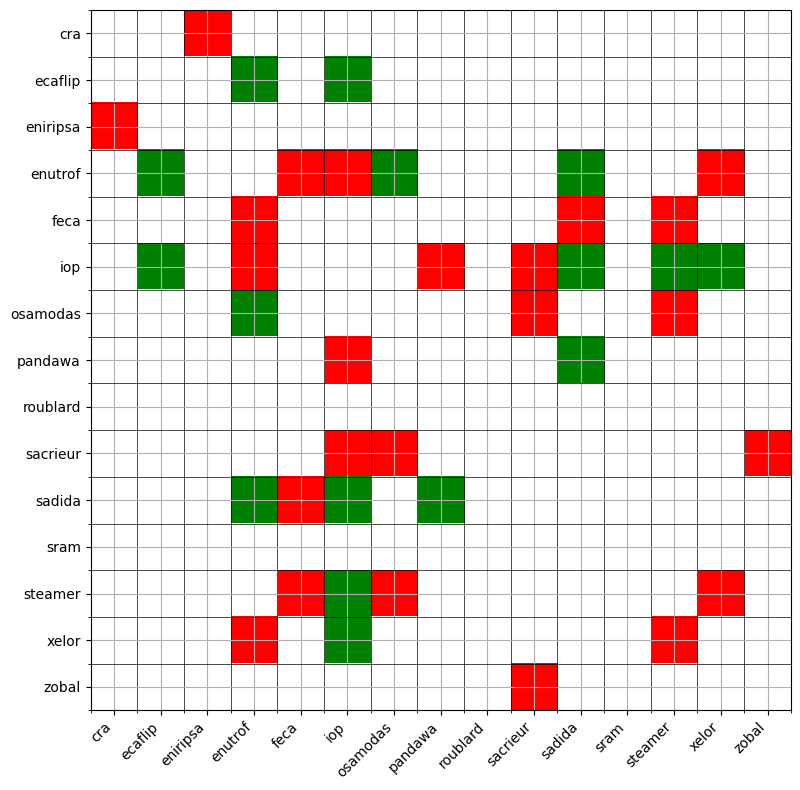

In [29]:
affiche_restri(diff_restri_KMC1et2)

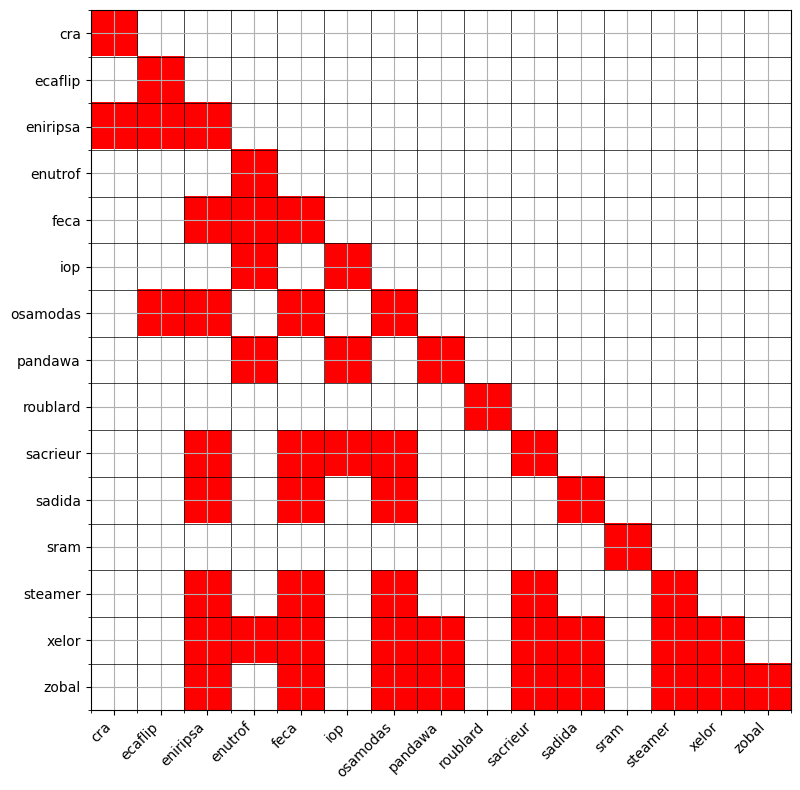

In [30]:
affiche_restri(restri_KMC2)